# Momentos del dia VS Duración de los viajes



## Cantidad de viajes por cada horario del día

###### Se verifica la cantidad de viajes durante el día para luego calcular los promedios mas precisamente y no ser victima de la ecuación malefica e innombrable

In [1]:
from root import *
import numpy as np

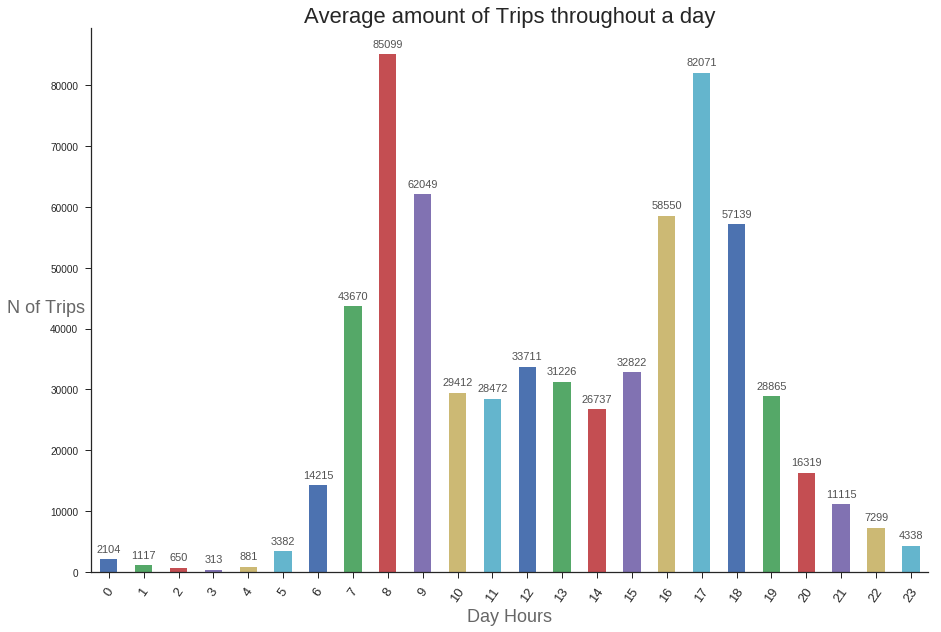

In [2]:
dfTripReduced = dfTrip[['start_date', 'duration']].sort_values(by=['start_date'])

# --------------------------------------------------------------------------------------------------
# RECORTO LOS VIAJES MENORES A 2 MINUTOS Y MAYORES A 6 HORAS
dfTripReduced = dfTripReduced[(2*60 <= dfTripReduced.duration) & (dfTripReduced.duration <= 6*3600)]
# --------------------------------------------------------------------------------------------------


dfTripReduced['hour'] = dfTripReduced.apply(lambda row: row.start_date.hour, axis=1)

sns.set_style("ticks")

ax = dfTripReduced[['hour', 'duration']].groupby(by=['hour'])\
                    .agg(['mean', 'count'])['duration']\
                    .rename(columns={'mean': 'avg_duration', 'count':'trips'})\
                    .plot(kind='bar', y='trips', color=sns.color_palette(), legend=False)

ax.figure.set_size_inches(15, 10)
ax.set_title('Average amount of Trips throughout a day', size=22)
ax.set_xlabel('Day Hours', size=18, alpha=0.7)
ax.set_ylabel('N of Trips', size=18, rotation='horizontal', position=(0, 0.47), alpha=0.7)
plt.xticks(rotation=55, size=13)
autolabel(ax, 11, 0.8)
sns.despine()
plt.show()

## Calculo de promedio de duración de los viajes de acuerdo a momento del día

##### Debido a que la cantidad de viajes durante la madrugada (entre las 0 hs y las 4 hs) es menor, es probable  que los promedios de duración sean muy altos o bajos de acuerdo al caso, por lo que se descartan estos datos para el cálculo de promedios. 



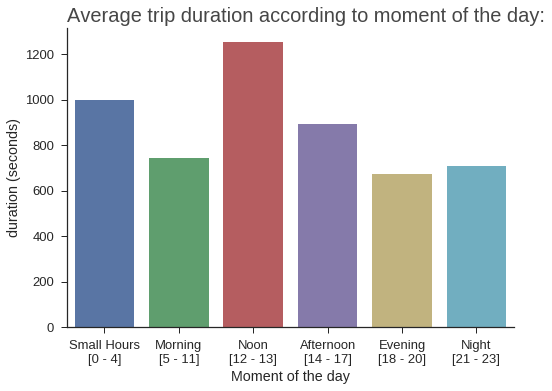

In [3]:
dfTripReduced['moment_of_day'] =  dfTripReduced.apply(getMomentOfDay, axis=1)

dfMomentOfDay = dfTripReduced[['moment_of_day', 'duration']]\
                                .groupby(by=['moment_of_day'])\
                                .agg('mean').reset_index()        

sns.set(font_scale=1.30)
sns.set_style('ticks')

bars = sns.barplot(y='duration',\
                   x='moment_of_day',\
                   order=['Small Hours', 'Morning', 'Noon', 'Afternoon', 'Evening', 'Night'],\
                   data=dfMomentOfDay)

sns.despine()

bars.set(ylabel='duration (seconds)',\
         xlabel='Moment of the day');

bars.set_xticklabels(['Small Hours\n[0 - 4]', 'Morning\n[5 - 11]', \
                      'Noon\n[12 - 13]', 'Afternoon\n[14 - 17]', \
                      'Evening\n[18 - 20]', 'Night\n[21 - 23]'])

bars.set_title('Average trip duration according to moment of the day:', size=20, loc='left', alpha=0.85);
plt.show()

In [19]:
# Saqué este gráfico porque no aportaba información nueva.

#dfHeatPlt = dfTripReduced[['duration', 'hour']]\
#                .groupby(by=['hour'])\
#                .agg(['mean', 'count'])

#dfHeatPlt = dfHeatPlt['duration'].rename(columns={'mean': 'avg_duration', 'count':'trips'}).reset_index()
#dfHeatPlt

#sns.set(font_scale=1.30)
#sns.set_style("ticks")

#graf = sns.lmplot(x='hour', y='avg_duration', \
#                  data=dfHeatPlt, \
#                  fit_reg=False, \
#                  hue="trips", \
#                  palette="YlOrRd", \
#                  scatter_kws={"s":25})

#graf.fig.set_size_inches(10, 10)
           
#plt.title('Histogram trips')
#plt.xlabel('Time')
#plt.ylabel('Duration (seconds)')
#plt.show()

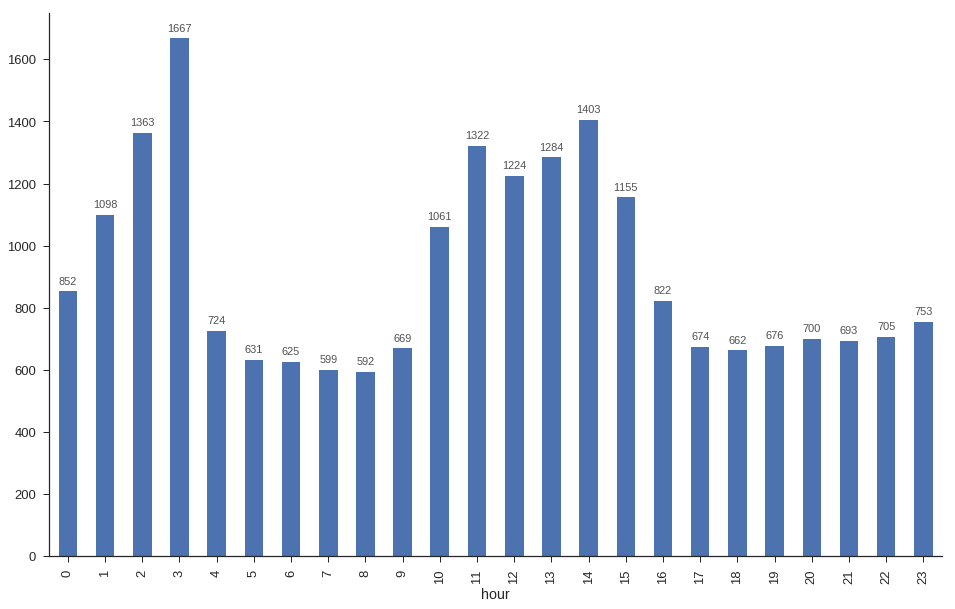

In [20]:
sns.set_style('ticks')

ax = dfTripReduced[['hour', 'duration']]\
            .groupby(by=['hour'])\
            .agg('mean')\
            .reset_index()\
            .plot(kind='bar', x='hour', y='duration', figsize=(16,10), legend=False)
            
sns.despine()

autolabel(ax, 11, 0.8)
plt.show()